In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import math
import os

In [97]:
# function to read specific csv files from the output folder and merge them
def merge_owid_worldbank_data(country):
    
    country = country.lower() # just in case, lol
    
    df_owid = pd.read_csv(f'output/owid_{country}_impute.csv')
    df_worldbank = pd.read_csv(f'output/worldbank_{country}_impute.csv')
    
    df_country = df_owid.merge(df_worldbank, how='left', on='year')
    df_country.drop(['iso_code_x', 'country_x'], axis=1, inplace=True)
    df_country.rename(columns={'iso_code_y': 'iso_code',
                               'country_y': 'country'}, inplace=True)
    
    # save merged dfs
    df_country.to_csv(f'output/merged_{country}.csv', index=False)
    
    return df_country

In [98]:
# df_china = pd.read_csv('output/merged_china.csv')
# df_us = pd.read_csv('output/merged_us.csv')
# df_india = pd.read_csv('output/merged_india.csv')

df_sector = pd.read_csv('dataset\owid\ghg-emissions-by-sector.csv')
df_china =  merge_owid_worldbank_data('china')
df_us =  merge_owid_worldbank_data('us')
df_india = merge_owid_worldbank_data('india')

<AxesSubplot:xlabel='Year'>

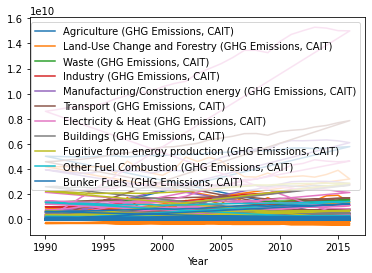

In [100]:
df_sector.set_index("Year").plot.line()

In [ ]:
df_sector.columns = df_sector.columns.str.replace("(GHG Emissions, CAIT)", "")
df_sector.columns = df_sector.columns.str.replace(r"\(.*\)","")
df_sector.columns

In [ ]:
df_sector_china = df_sector[df_sector['Code'] == "CHN"]
df_sector_india = df_sector[df_sector['Code'] == "IND"]
df_sector_usa = df_sector[df_sector['Code'] == "USA"]

In [ ]:
df_sector_merged_china = df_sector.merge(df_sector_china, left_on=['Code','Year','Entity'], right_on=['Code','Year','Entity'],suffixes=('', '_y'))
df_sector_merged_china.columns = df_sector_merged_china.columns.str.replace("_y", "")
df_sector_merged_china.head()


In [ ]:
df_sector_merged_india = df_sector.merge(df_sector_india, left_on=['Code','Year','Entity'], right_on=['Code','Year','Entity'],suffixes=('', '_y'))
df_sector_merged_india.columns = df_sector_merged_india.columns.str.replace("_y", "")
df_sector_merged_india.head()

In [ ]:
df_sector_merged_usa = df_sector.merge(df_sector_usa, left_on=['Code','Year','Entity'], right_on=['Code','Year','Entity'],suffixes=('', '_y'))
df_sector_merged_usa.columns = df_sector_merged_usa.columns.str.replace("_y", "")
df_sector_merged_usa.head()

In [ ]:
## TO DO
# come up with 2 EDA questions + 1 ML question
# ...
# Covid impact to CO2 ( Mar 2020 - Mar 2021)